In [3]:
import os

directory = "set_mlp_cifar10_results_accuracy_seed=3/"
results = os.listdir(directory)
results

['fisherdiagonalskipset.csv',
 'fisherdiagonalset.csv',
 'neuroncentralityset.csv',
 'randomset.csv',
 'neuronemaset.csv']

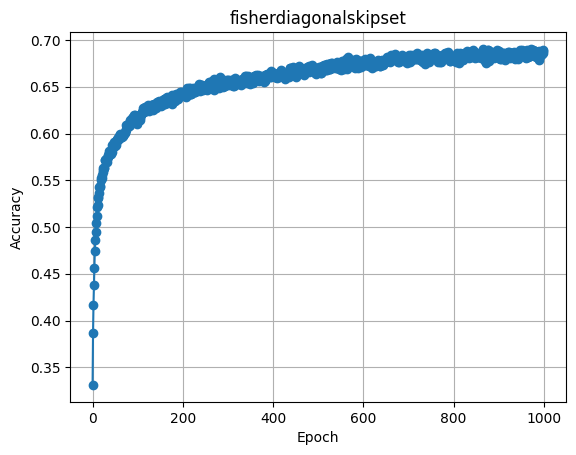

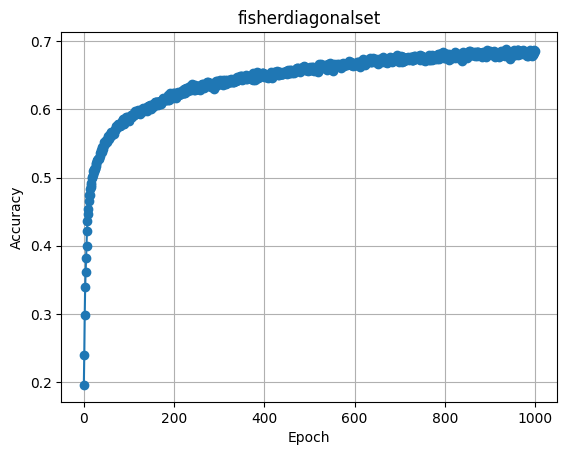

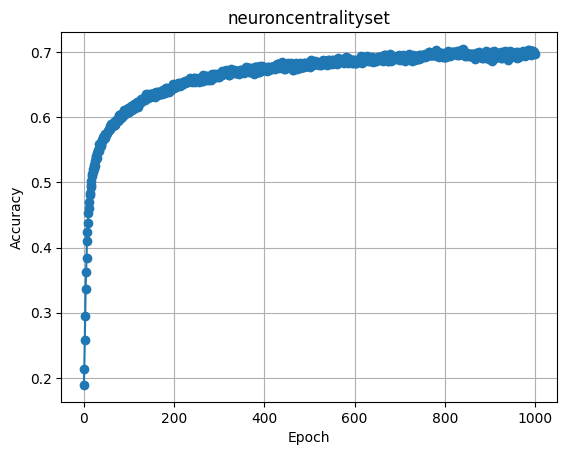

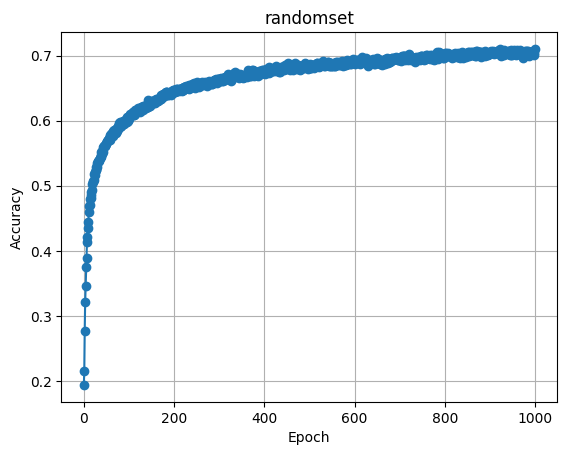

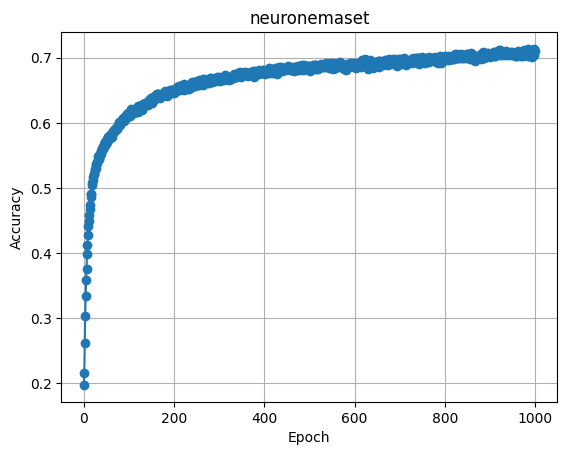

In [4]:
import csv
import matplotlib.pyplot as plt

rs = {}

for file in results:
    with open(os.path.join(directory, file), "r") as f:
        reader = csv.reader(f)
        accs = [float(row[0]) for row in reader if row]
        name = file[:-4]
        rs[name] = accs
        plt.figure()
        plt.plot(accs, marker='o')
        plt.title(name)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.show()


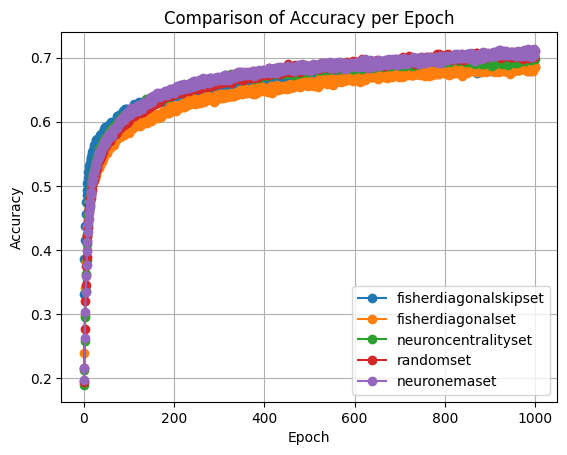

In [5]:
plt.figure()
for name, accs in rs.items():
    plt.plot(accs, marker='o', label=name)
plt.title('Comparison of Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
def find_convergence_epoch(data, threshold=0.64):
    resd = {}
    for name, accs in data.items():
        resd[name] = -1
        for i, acc in enumerate(accs):
            if acc >= threshold:
                resd[name] = i
                break
    return resd

find_convergence_epoch(rs, threshold=0.6888)

{'fisherdiagonalskipset': 842,
 'fisherdiagonalset': 936,
 'neuroncentralityset': 563,
 'randomset': 453,
 'neuronemaset': 483}

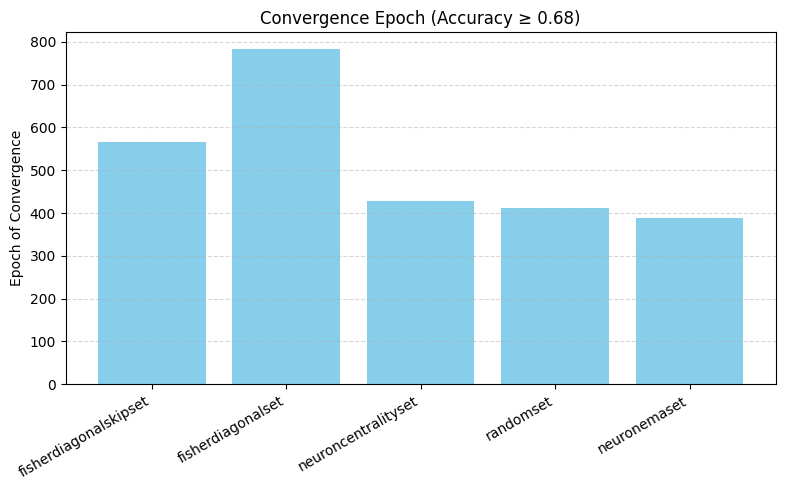

In [19]:
# Compute the convergence epochs
convergence_epochs = find_convergence_epoch(rs, threshold=0.68)

# Plot the convergence epochs
plt.figure(figsize=(8,5))
names = list(convergence_epochs.keys())
epochs = [convergence_epochs[n] if convergence_epochs[n] != -1 else float('nan') for n in names]
plt.bar(names, epochs, color='skyblue')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Epoch of Convergence')
plt.title(f"Convergence Epoch (Accuracy ≥ 0.68)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()